In [3]:
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [5]:
cat_img = cv2.imread("cat.jpg")
dog_img = cv2.imread("dog.jpg")


In [49]:
dog_lf= cv2.GaussianBlur(dog_img, (25, 25), 50)

# cv2.imwrite('dog_lf.jpg', dog_lf)

cv2.imshow('dog_lf', dog_lf)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [50]:
sobel_x = cv2.Sobel(cat_img, cv2.CV_64F, 1, 0, ksize=7)
sobel_y = cv2.Sobel(cat_img, cv2.CV_64F, 0, 1, ksize=7)

# Combine the gradients (magnitude)
cat_hf = cv2.magnitude(sobel_x, sobel_y)

# Normalize Sobel gradient to [0, 255]
cat_hf_normalized = (cat_hf * 255 / cat_hf.max()).astype(np.uint8)

cat_hf_normalized= cv2.GaussianBlur(cat_hf_normalized, (3, 3),3)

# cv2.imwrite('cat_hf_normalized.jpg', cat_hf_normalized)

cv2.imshow('cat_hf', cat_hf_normalized)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [51]:
# hybrid_cat = cv2.add(dog_lf, cat_hf_normalized)
hybrid_cat = cv2.addWeighted(dog_lf, 0.5, cat_hf_normalized, 0.5, 0)

# cv2.imwrite('hybrid_cat.jpg', hybrid_cat)

cv2.imshow('Hybrid cat', hybrid_cat)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [52]:
cat_lf= cv2.GaussianBlur(cat_img, (55, 55), 50)

cv2.imshow('cat_lf', cat_lf)
cv2.waitKey(0)
cv2.destroyAllWindows()

sobel_x = cv2.Sobel(dog_img, cv2.CV_64F, 1, 0, ksize=7)
sobel_y = cv2.Sobel(dog_img, cv2.CV_64F, 0, 1, ksize=7)

# Combine the gradients (magnitude)
dog_hf = cv2.magnitude(sobel_x, sobel_y)

# Normalize Sobel gradient to [0, 255]
dog_hf_normalized = (dog_hf * 255 / dog_hf.max()).astype(np.uint8)

dog_hf_normalized= cv2.GaussianBlur(dog_hf_normalized, (3, 3),3)

cv2.imshow('dog_lf', dog_hf_normalized)
cv2.waitKey(0)
cv2.destroyAllWindows()

# hybrid_cat = cv2.add(dog_lf, cat_hf_normalized)
hybrid_dog = cv2.addWeighted(cat_lf, 0.5, dog_hf_normalized, 0.5, 0)

cv2.imshow('hybrid_dog', hybrid_dog)
cv2.waitKey(0)
cv2.destroyAllWindows()

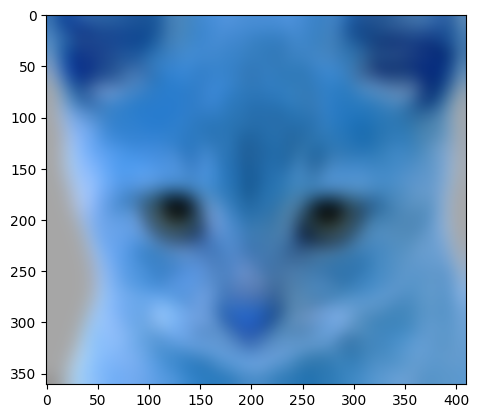

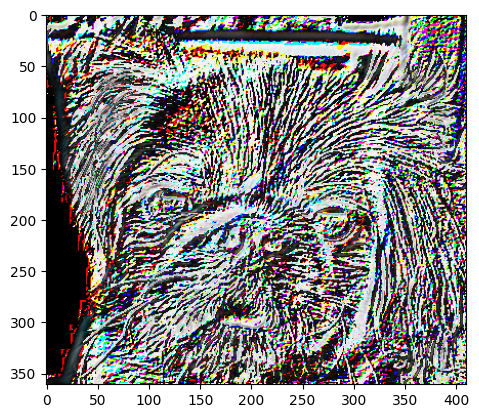

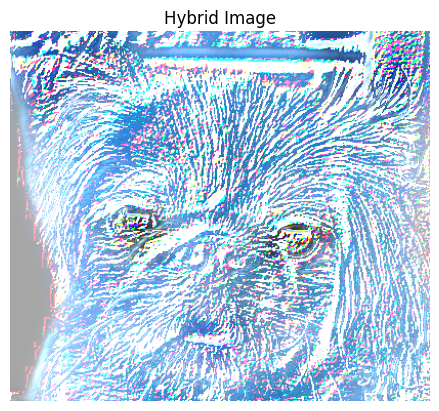

True

In [150]:
cat_lf = cv2.GaussianBlur(cat_img, (55, 55), 0)
# cv2.imshow('My Image', filtered_image)
plt.imshow(cat_lf, cmap='gray')
plt.show()

cv2.imwrite('cat_lf.jpg', cat_lf)


sobel_x = cv2.Sobel(dog_img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(dog_img, cv2.CV_64F, 0, 1, ksize=3)

# Combine the gradients (magnitude)
dof_hf = cv2.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0)

# Normalize Sobel gradient to [0, 255]
dof_hf_normalized = (dof_hf * 255 / dof_hf.max()).astype(np.uint8)

plt.imshow(dof_hf_normalized, cmap='gray')
plt.show()

cv2.imwrite('sobel_normalized.jpg', dof_hf_normalized)

hybrid_dog = cv2.add(cat_lf, dof_hf_normalized)
# hybrid_dog = cv2.addWeighted(cat_lf, 0.8, dof_hf_normalized, 0.2, 0)
# Display the hybrid image
plt.imshow(hybrid_dog, cmap='gray')
plt.title("Hybrid Image")
plt.axis('off')
plt.show()

cv2.imwrite('hybrid_dog.jpg', hybrid_dog)